<a href="https://colab.research.google.com/github/srilaadebnath/ML_LAB_CODES/blob/main/question14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [ ]:
data = pd.read_csv("cars_clus.csv")
print("First 5 rows:\n", data.head())
data.replace(['$null$', '?', 'NULL', 'NaN', 'nan'], np.nan, inplace=True)
data_numeric = data.select_dtypes(include=[np.number])
for col in data.columns:
    if col not in data_numeric.columns:
        try:
            data[col] = data[col].astype(float)
        except:
            pass
data_numeric = data.select_dtypes(include=[np.number])
data_numeric = data_numeric.dropna()

First 5 rows:
   manufact    model   sales  resale   type   price engine_s horsepow wheelbas  \
0    Acura  Integra  16.919  16.360  0.000  21.500    1.800  140.000  101.200   
1    Acura       TL  39.384  19.875  0.000  28.400    3.200  225.000  108.100   
2    Acura       CL  14.114  18.225  0.000  $null$    3.200  225.000  106.900   
3    Acura       RL   8.588  29.725  0.000  42.000    3.500  210.000  114.600   
4     Audi       A4  20.397  22.255  0.000  23.990    1.800  150.000  102.600   

    width   length curb_wgt fuel_cap     mpg lnsales  partition  
0  67.300  172.400    2.639   13.200  28.000   2.828        0.0  
1  70.300  192.900    3.517   17.200  25.000   3.673        0.0  
2  70.600  192.000    3.470   17.200  26.000   2.647        0.0  
3  71.400  196.600    3.850   18.000  22.000   2.150        0.0  
4  68.200  178.000    2.998   16.400  27.000   3.015        0.0  


In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)
print("\nNumeric columns used for clustering:\n", data_numeric.columns.tolist())
print("\nData shape after cleaning:", data_scaled.shape)


Numeric columns used for clustering:
 ['sales', 'resale', 'type', 'price', 'engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg', 'lnsales', 'partition']

Data shape after cleaning: (117, 14)



Agglomerative Clustering (Single Linkage) — Cluster Counts:
1    114
2      1
4      1
3      1
Name: count, dtype: int64


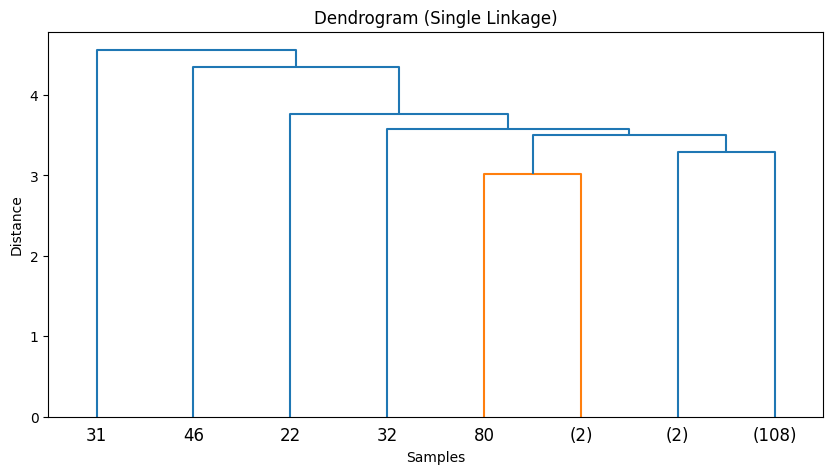

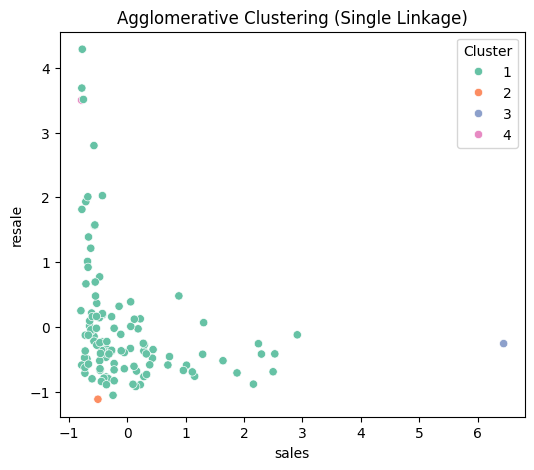


Agglomerative Clustering (Complete Linkage) — Cluster Counts:
1    64
4    44
3     8
2     1
Name: count, dtype: int64


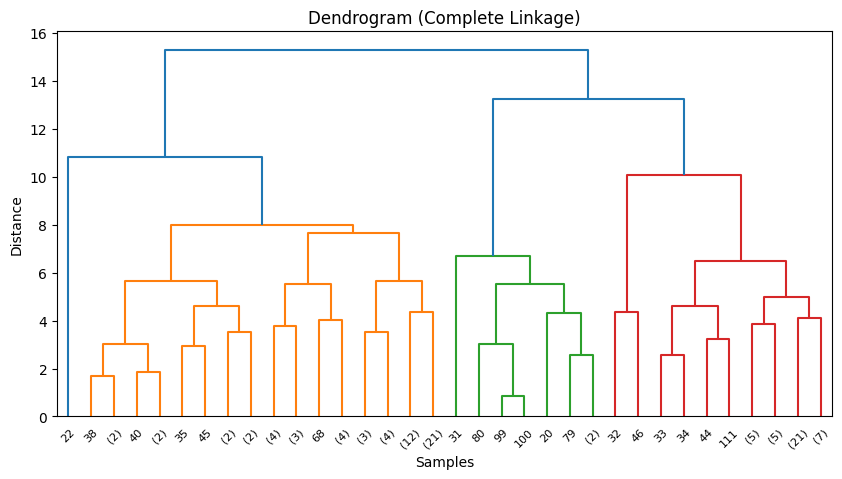

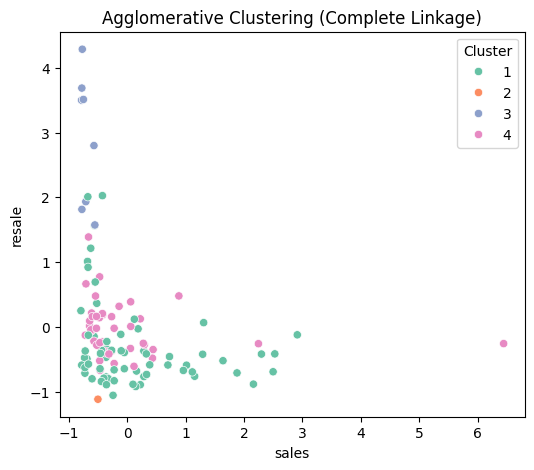


Agglomerative Clustering (Average Linkage) — Cluster Counts:
2    101
3      9
1      6
4      1
Name: count, dtype: int64


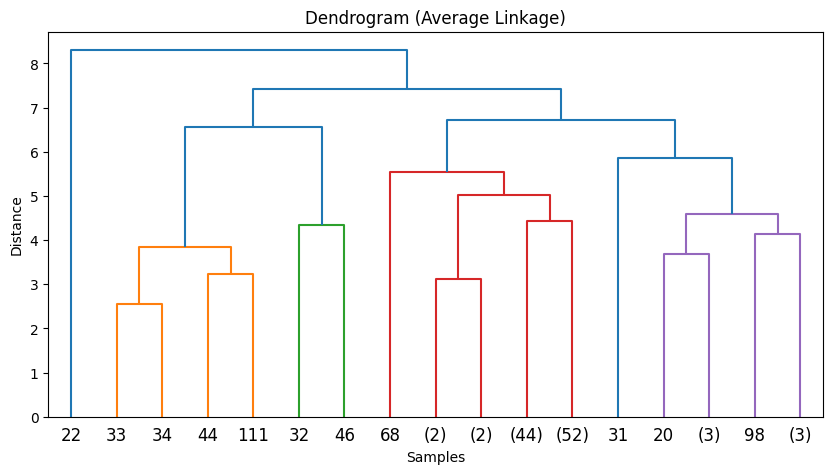

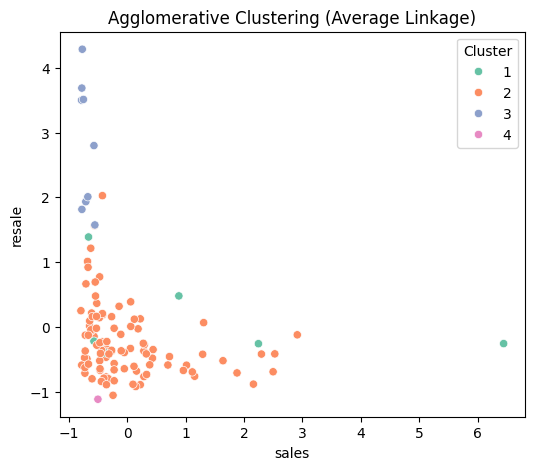

In [ ]:
linkage_methods = ['single', 'complete', 'average']

data_clean = data_numeric.copy()

for method in linkage_methods:
    Z = linkage(data_scaled, method=method)
    clusters = fcluster(Z, t=4, criterion='maxclust')

    data_clean[f'Agglomerative_{method}_cluster'] = clusters

    print(f"\nAgglomerative Clustering ({method.title()} Linkage) — Cluster Counts:")
    print(pd.Series(clusters).value_counts())

    plt.figure(figsize=(10, 5))
    dendrogram(Z, truncate_mode='level', p=5)
    plt.title(f"Dendrogram ({method.title()} Linkage)")
    plt.xlabel("Samples")
    plt.ylabel("Distance")
    plt.show()

    if data_scaled.shape[1] >= 2:
        plt.figure(figsize=(6, 5))
        sns.scatterplot(
            x=data_scaled[:, 0],
            y=data_scaled[:, 1],
            hue=clusters,
            palette='Set2'
        )
        plt.title(f"Agglomerative Clustering ({method.title()} Linkage)")
        plt.xlabel(data_numeric.columns[0])
        plt.ylabel(data_numeric.columns[1])
        plt.legend(title='Cluster')
        plt.show()


In [ ]:
def divisive_clustering(X, n_clusters=4):
    n_samples = X.shape[0]
    labels = np.zeros(n_samples, dtype=int)
    clusters = [np.arange(n_samples)]
    current_label = 0

    while len(np.unique(labels)) < n_clusters:

        cluster_sizes = [len(idx) for idx in clusters]
        largest_idx = np.argmax(cluster_sizes)
        largest_cluster = clusters.pop(largest_idx)

        if len(largest_cluster) <= 1:
            clusters.append(largest_cluster)
            break

        kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
        sub_labels = kmeans.fit_predict(X[largest_cluster])

        sub_a = largest_cluster[sub_labels == 0]
        sub_b = largest_cluster[sub_labels == 1]

        if len(sub_a) == 0 or len(sub_b) == 0:
            clusters.append(largest_cluster)
            continue

        new_label = labels.max() + 1
        labels[sub_a] = current_label
        labels[sub_b] = new_label

        clusters.append(sub_a)
        clusters.append(sub_b)

        current_label += 1

    return labels

In [ ]:
div_labels = divisive_clustering(data_scaled, n_clusters=4)

data_numeric = data_numeric.copy()
data_numeric['Divisive_Cluster'] = div_labels

print("\nDivisive Clustering — Cluster Counts:")
print(data_numeric['Divisive_Cluster'].value_counts())


Divisive Clustering — Cluster Counts:
Divisive_Cluster
3    38
1    36
2    24
4    19
Name: count, dtype: int64


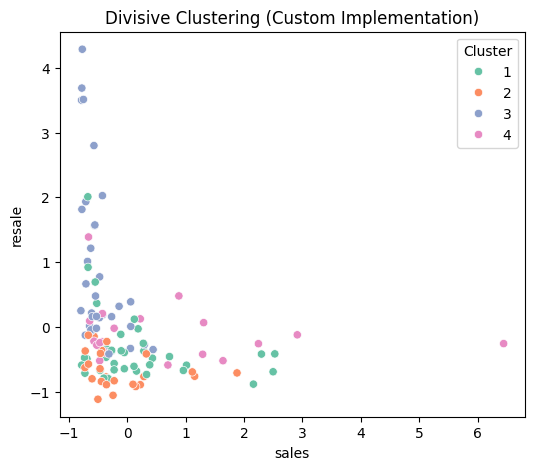

In [ ]:
if data_scaled.shape[1] >= 2:
    plt.figure(figsize=(6, 5))
    sns.scatterplot(
        x=data_scaled[:, 0],
        y=data_scaled[:, 1],
        hue=div_labels,
        palette='Set2'
    )
    plt.title("Divisive Clustering (Custom Implementation)")
    plt.xlabel(data_numeric.columns[0])
    plt.ylabel(data_numeric.columns[1])
    plt.legend(title='Cluster')
    plt.show()


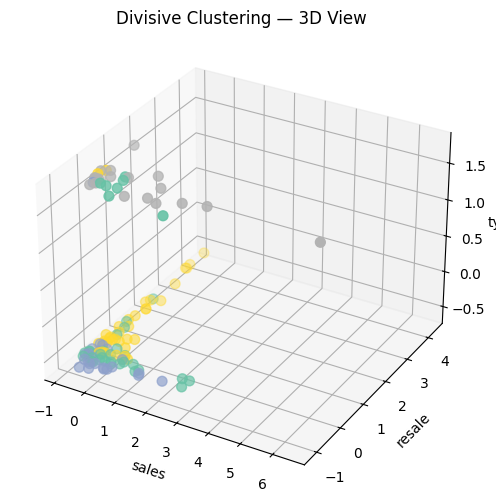

In [ ]:
if data_scaled.shape[1] >= 3:
    fig = plt.figure(figsize=(7, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(
        data_scaled[:, 0], data_scaled[:, 1], data_scaled[:, 2],
        c=div_labels, cmap='Set2', s=50
    )
    ax.set_title("Divisive Clustering — 3D View")
    ax.set_xlabel(data_numeric.columns[0])
    ax.set_ylabel(data_numeric.columns[1])
    ax.set_zlabel(data_numeric.columns[2])
    plt.show()